## Feature Engineering


In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
## check missing value
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
## Delete the rows having null values

df.shape

(891, 15)

In [8]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

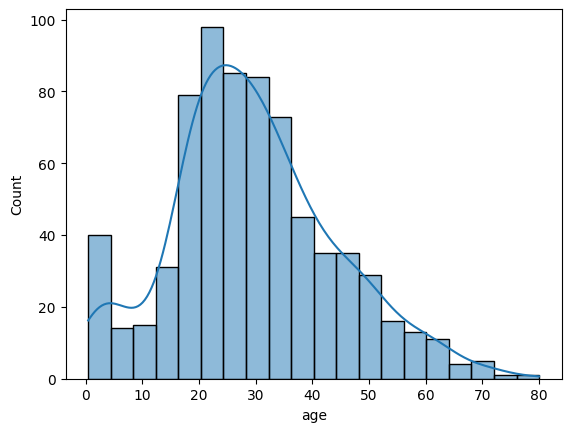

In [11]:
## Imputation techinques
## Mean VAlue Imputattion

sns.histplot(df['age'],kde=True)


In [19]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='Age_mean', ylabel='Count'>

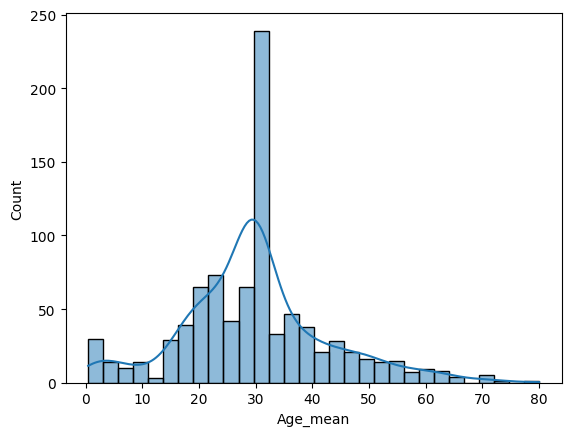

In [20]:
sns.histplot(df['Age_mean'],kde=True)

## Mean Imputaion works well when we have normally distributed data

## 2. Median Value Impudation 

In [21]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [22]:
df[['Age_median','age','Age_mean']]

,Age_median,age,Age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,28.0,NaN,29.699118
889,26.0,26.0,26.000000


## 3- MODE Imputation 

In [25]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean,Age_Mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [27]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [29]:
df['embarked_mode']= df['embarked'].fillna(mode_value)

In [30]:
df['embarked_mode']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked_mode, Length: 891, dtype: object

In [31]:
df['embarked_mode'].isnull().sum()

np.int64(0)

## UpSampling 
## Down Sampling
to handle Imbalance data set


In [1]:
import numpy as np
import pandas as pd 
# set the random seed for reproducibility
np.random.seed(123)
n_samples =1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = int(n_samples-n_class_0)


In [2]:
n_class_0,n_class_1

(900, 100)

In [3]:
## Create My data frame with imbalance dataframe
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0

})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1

})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [8]:
## Upsampling : upsale /create points for 1 
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [10]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,
         n_samples= len(df_majority),
         random_state=42
         )

In [11]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [13]:
df_upsampled=pd.concat([df_minority_upsampled,df_majority])

In [14]:
df_upsampled['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

In [15]:
np.random.seed(123)
n_samples =1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = int(n_samples-n_class_0)

In [16]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0

})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1

})

df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [17]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [18]:
## Down Sample of 0
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]


In [19]:
df_downsample_mjority=resample(df_majority,replace=False,n_samples=len(df_minority), random_state=42)

In [20]:
df = pd.concat([df_downsample_mjority,df_minority])

In [21]:
df['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

## SMOTE(Synthetic Minority Oversampling Techinique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address class imbalance in datasets. It works by generating synthetic examples for the minority class instead of simply duplicating existing instances. This helps improve model performance by ensuring that classifiers do not become biased toward the majority class.

How SMOTE Works
Identify the Minority Class: SMOTE focuses on the class with fewer samples in the dataset.
Select a Random Sample: It picks a random instance from the minority class.
Find k-Nearest Neighbors: It finds the k-nearest neighbors of the selected sample within the minority class.
Generate Synthetic Data: A new synthetic data point is created by interpolating between the selected instance and one of its nearest neighbors.
Mathematically, if 

Advantages of SMOTE
Reduces Overfitting: Unlike simple duplication, synthetic samples provide more diversity.
Improves Model Performance: It helps classifiers learn better decision boundaries.
Balances Datasets: It effectively addresses class imbalance problems.
Limitations of SMOTE
Noise Sensitivity: If the dataset contains noisy samples, SMOTE can amplify the noise.
Not Always Effective for Overlapping Classes: If the classes are not well-separated, synthetic samples may increase misclassification.SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address class imbalance in datasets. It works by generating synthetic examples for the minority class instead of simply duplicating existing instances. This helps improve model performance by ensuring that classifiers do not become biased toward the majority class.


In [22]:
from sklearn.datasets import make_classification

In [24]:
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,
                    weights=[.90],random_state=12,n_redundant=0)

In [25]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['Target'])
final_df =pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [27]:
final_df['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

In [28]:
import matplotlib.pyplot as plt

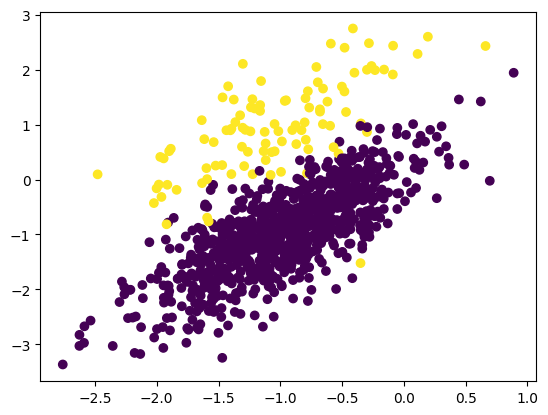

In [31]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['Target'])

In [33]:
## Applying smote
!pip install imblearn

In [36]:
from imblearn.over_sampling import SMOTE

In [38]:
oversample=SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['Target'])

In [39]:
x.shape

(1800, 2)

In [40]:
y.shape

(1800,)

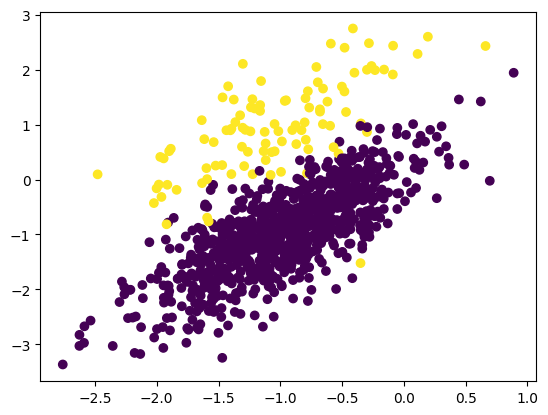

In [42]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['Target'])
final_df =pd.concat([df1,df2],axis=1)

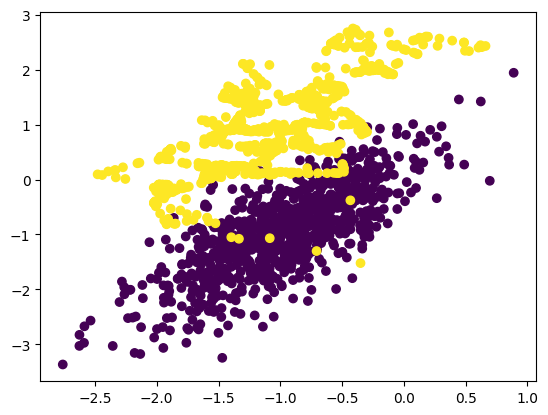

In [43]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['Target'])

## 5 number Summary And BOx Plot

In [44]:
## Minimum ,Maximum ,Median,q1,q3,IQR
import numpy as np

In [49]:
lst_marks =[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,74,67]
minimum,Q1,median,Q3,maximum =np.quantile(lst_marks,[0,0.25,0.50,0.75,1])

In [51]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [52]:
IQR = Q3-Q1

In [53]:
lower_fence =Q1-1.5*(IQR)
higher_fence =Q1+1.5*(IQR)

<Axes: >

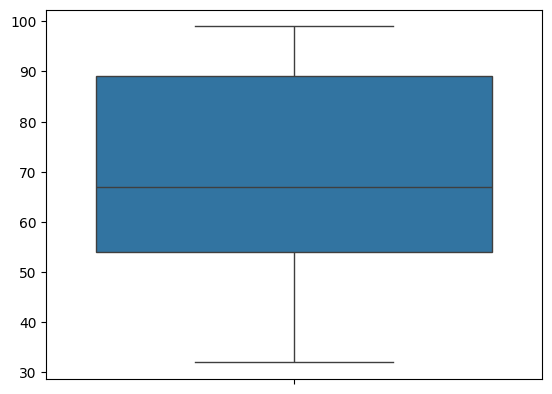

In [54]:
import seaborn as sns
sns.boxplot(lst_marks)

<Axes: >

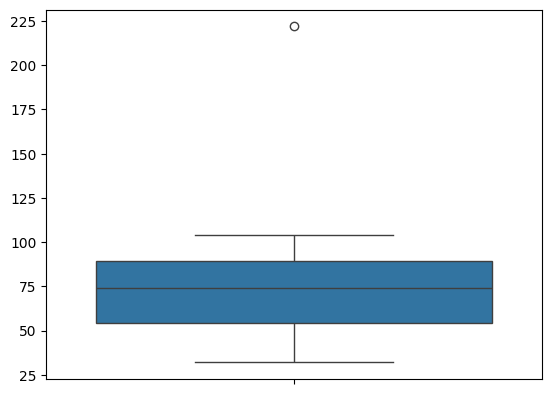

In [57]:
lst_marks =[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,74,67,104,222]
sns.boxplot(lst_marks)

## Data Encoding 
1. Normal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding

### **1. Normal Encoding / One-Hot Encoding (OHE)**  
One-Hot Encoding (OHE) is a method of converting categorical variables into a numerical format by creating **binary columns** for each unique category.

#### **How It Works**
- Each unique category in a categorical column is converted into a new column.
- A **binary value (0 or 1)** is assigned to indicate whether a row belongs to that category.

#### **Example**
```python
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']})
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['Color']])

# Convert to DataFrame
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
print(df_encoded)
```
##### **Output:**
| Red | Blue | Green |
|------|------|------|
| 1    | 0    | 0    |
| 0    | 1    | 0    |
| 0    | 0    | 1    |
| 1    | 0    | 0    |
| 0    | 0    | 1    |

#### **Pros:**
✅ No ordinal relationships assumed  
✅ Works well with categorical variables that have no order  

#### **Cons:**
❌ Can create a large number of columns if the category count is high (Curse of Dimensionality)  
❌ Increases memory usage  

---

### **2. Label Encoding & Ordinal Encoding**
Both **Label Encoding** and **Ordinal Encoding** assign unique numerical values to categorical variables.

#### **Label Encoding**
- Converts categories into **integer values**.
- Example: "Red" → 0, "Blue" → 1, "Green" → 2.
- Used when there is **no natural order**.

#### **Example**
```python
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']})
encoder = LabelEncoder()
df['Encoded_Color'] = encoder.fit_transform(df['Color'])
print(df)
```
##### **Output:**
| Color | Encoded_Color |
|------|--------------|
| Red  | 2           |
| Blue | 0           |
| Green | 1          |
| Red  | 2           |
| Green | 1          |

#### **Ordinal Encoding**
- Used when categories have a **logical order** (e.g., Small < Medium < Large).
- Converts categorical values into **ranked integers**.

#### **Example**
```python
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']})
encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df['Encoded_Size'] = encoder.fit_transform(df[['Size']])
print(df)
```
##### **Output:**
| Size  | Encoded_Size |
|-------|-------------|
| Small | 0           |
| Medium | 1          |
| Large | 2           |
| Small | 0           |
| Large | 2           |

#### **Pros of Label & Ordinal Encoding**
✅ Simple and memory-efficient  
✅ Useful for algorithms like decision trees  

#### **Cons**
❌ Label Encoding **may introduce a false ordinal relationship** in non-ordered categories  
❌ Ordinal Encoding requires correct ordering  

---

### **3. Target Guided Ordinal Encoding**
Target Guided Ordinal Encoding assigns numerical values to categorical variables **based on their relationship with the target variable**.

#### **How It Works**
1. Calculate the **mean (or median) of the target variable** for each category.
2. Assign **ranked values** based on these means.

#### **Example**
Consider a dataset where we predict **House Price** (`Target`) based on `Neighborhood`.

| Neighborhood | House Price (Target) |
|-------------|----------------------|
| A           | 300,000              |
| B           | 500,000              |
| C           | 700,000              |

- Compute the mean house price per neighborhood:
  - A → **300,000**
  - B → **500,000**
  - C → **700,000**
- Assign ordinal values based on the target mean:
  - A → **0**
  - B → **1**
  - C → **2**

#### **Implementation in Python**
```python
import pandas as pd

df = pd.DataFrame({
    'Neighborhood': ['A', 'B', 'C', 'A', 'C'],
    'Price': [300000, 500000, 700000, 350000, 750000]
})

# Compute mean target for each category
target_mean = df.groupby('Neighborhood')['Price'].mean().sort_values()

# Create a mapping
encoding_map = {key: idx for idx, key in enumerate(target_mean.index)}

# Apply mapping
df['Encoded_Neighborhood'] = df['Neighborhood'].map(encoding_map)
print(df)
```

#### **Pros:**
✅ Captures relationship between categorical variable and target  
✅ Works well with high-cardinality categorical features  

#### **Cons:**
❌ Needs to be updated when new data arrives  
❌ Can lead to **data leakage** if not handled correctly  

---

### **Comparison Table**
| Encoding Type | How It Works | Best Use Case | Pros | Cons |
|--------------|-------------|---------------|------|------|
| **One-Hot Encoding (OHE)** | Creates binary columns for each category | When categorical data has no order | No ordinal assumption, works well with ML models | Increases dimensionality |
| **Label Encoding** | Assigns unique integer to each category | When no ordinal relationship exists | Simple & memory-efficient | Can introduce false order |
| **Ordinal Encoding** | Assigns numbers based on natural order | When categories have a clear order | Respects ranking of values | Needs correct ordering |
| **Target Guided Ordinal Encoding** | Assigns numbers based on target mean/median | When categorical data has strong correlation with the target | Captures target relationships | Risk of data leakage |



In [60]:
## Nominal/OHE
from sklearn.preprocessing import OneHotEncoder
df =pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [59]:
## create an instance of OneHotencoder

In [62]:
encoder = OneHotEncoder()

In [66]:
## perfrom fit and then transform
encoded=encoder.fit_transform(df[['color']]).toarray()

In [67]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [68]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [70]:
encoder.transform([['blue']]).toarray()

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [71]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


<Axes: >

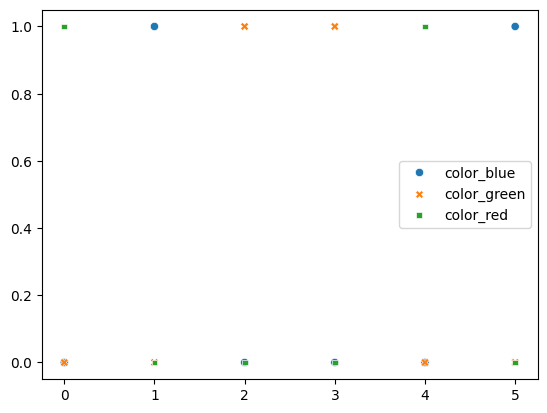

In [72]:
sns.scatterplot(encoded_df)

In [73]:
## Label Encoding 
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
label_encoder =LabelEncoder()

In [78]:
label_encoder.fit_transform(df[['color']])

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [80]:
label_encoder.transform([['red']])      

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [81]:
label_encoder.transform([['blue']])      


d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [82]:
label_encoder.transform([['green']])      


d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [83]:
## Ordinal Encoding(Where Ranks of Data is Important )
from sklearn.preprocessing import OrdinalEncoder

In [84]:
df =pd.DataFrame({
    'size': ['small','medium','large','medium','small','large']
})

In [85]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [88]:
## create an instane of ordianal encoder and perform fit and transform
encoder = OrdinalEncoder(categories=[['small','medium','large']])

In [89]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [90]:
encoder.transform([['small']])

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [92]:
## Target Guided Ordinal Encoding
df = pd.DataFrame({
    'city':['New York','London','Paris','Tokyo','New York','Paris'],
    'price':[200,150,300,250,180,320]
})

In [93]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [96]:
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [97]:
df['city_encoded'] = df['city'].map(mean_price)

In [98]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [99]:
df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [101]:
df =sns.load_dataset('tips')

In [102]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [104]:
mean_data=df.groupby('time')['total_bill'].mean().to_dict()

C:\Users\aryan\AppData\Local\Temp\ipykernel_7672\4011445758.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data=df.groupby('time')['total_bill'].mean().to_dict()


In [105]:
mean_data

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [106]:
df['time_encoded'] = df['time'].map(mean_data)

In [109]:
df[['time']].value_counts()

time  
Dinner    176
Lunch      68
Name: count, dtype: int64